<a href="https://colab.research.google.com/github/muhammadhafiz27/Projek_UAS_Data-Mining_Muhammad-Hafiz/blob/main/Projek_UAS_Data_Mining_Muhammad_Hafiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# **Import Dataset**

In [2]:
# Memuat dataset
df = pd.read_csv('https://raw.githubusercontent.com/muhammadhafiz27/Projek_UAS_Data-Mining_Muhammad-Hafiz/refs/heads/main/Dataset/Crop_recommendation.csv')

# **Exploratory Data**

In [3]:
# Menampilkan beberapa baris pertama dari bingkai data
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [4]:
# Dapatkan informasi tentang kerangka data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


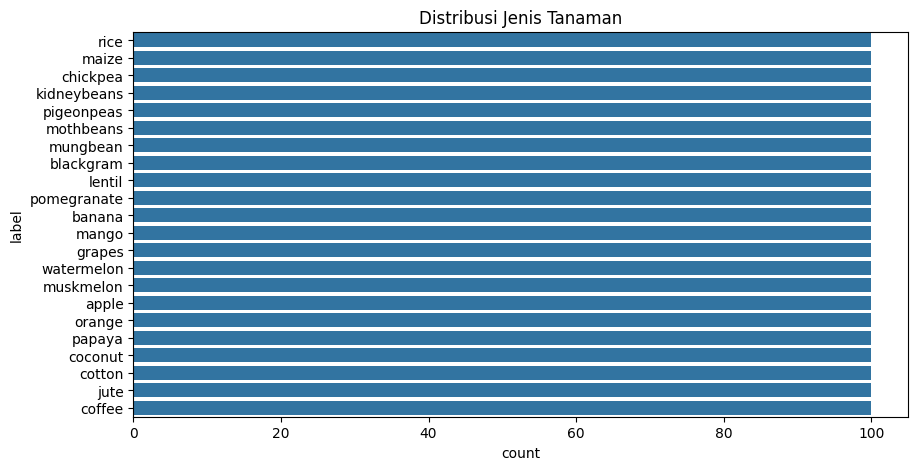

In [5]:
# Cek jumlah label per tanaman
plt.figure(figsize=(10,5))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title('Distribusi Jenis Tanaman')
plt.show()

Visualisasi Data Menggunakan Boxplot

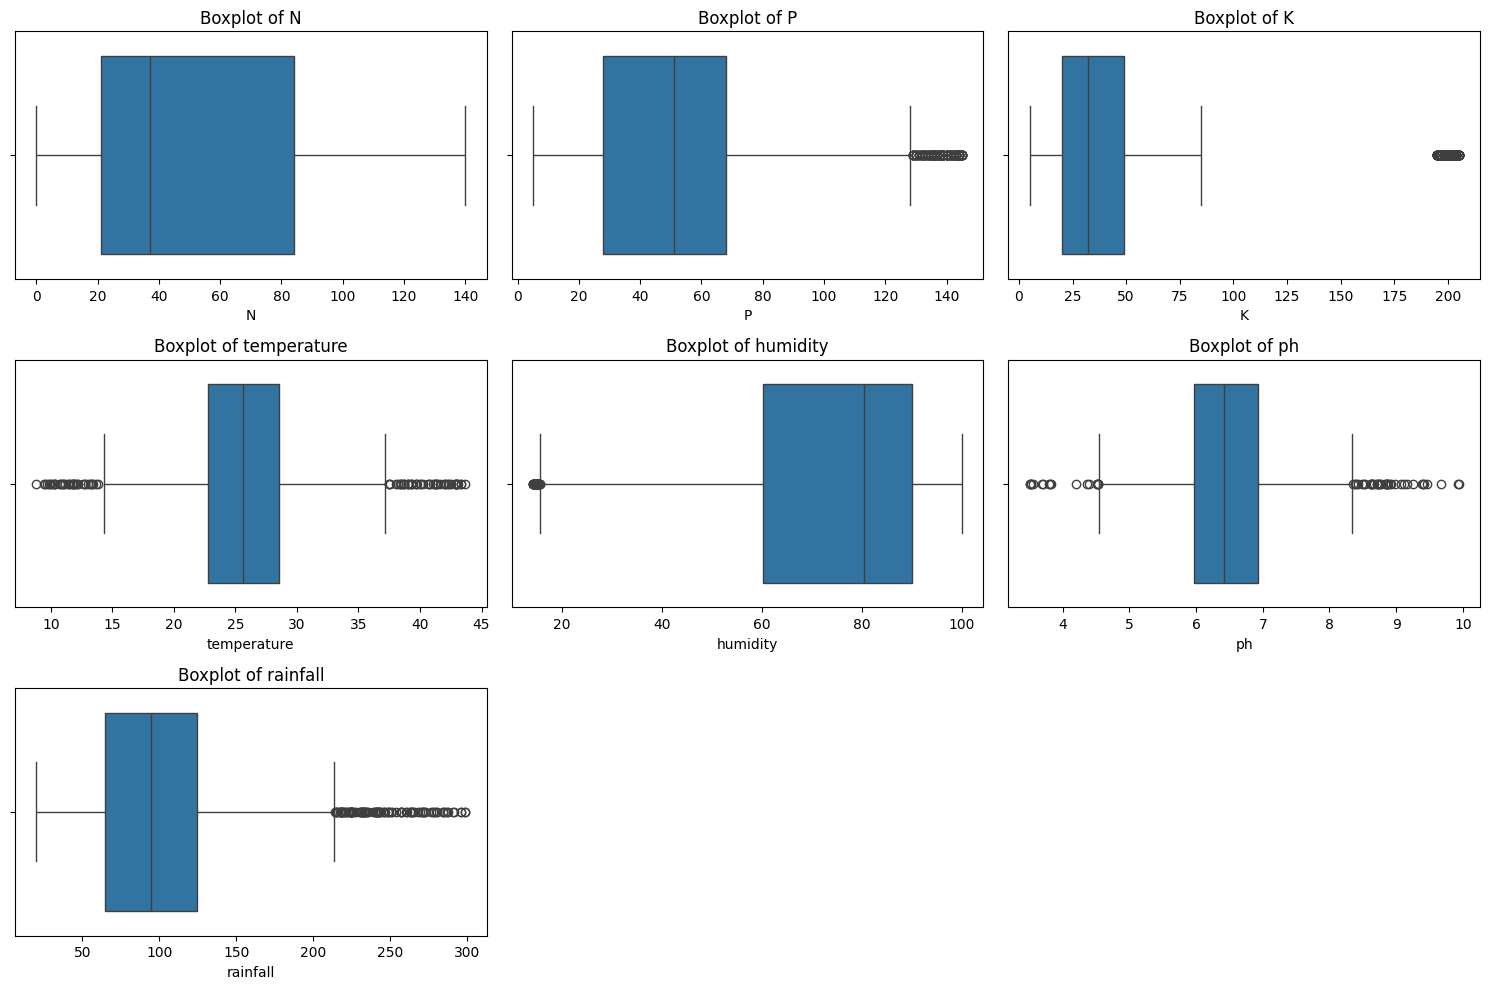

In [6]:
# List kolom fitur numerik
features = df.columns[:-1]

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Melihat berapa outliers pada dataset

In [7]:
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f'{col}: {len(outliers)} outliers')

N: 0 outliers
P: 138 outliers
K: 200 outliers
temperature: 86 outliers
humidity: 30 outliers
ph: 57 outliers
rainfall: 100 outliers



After replacing outliers:
N: 0 outliers
P: 0 outliers
K: 0 outliers
temperature: 0 outliers
humidity: 0 outliers
ph: 0 outliers
rainfall: 0 outliers


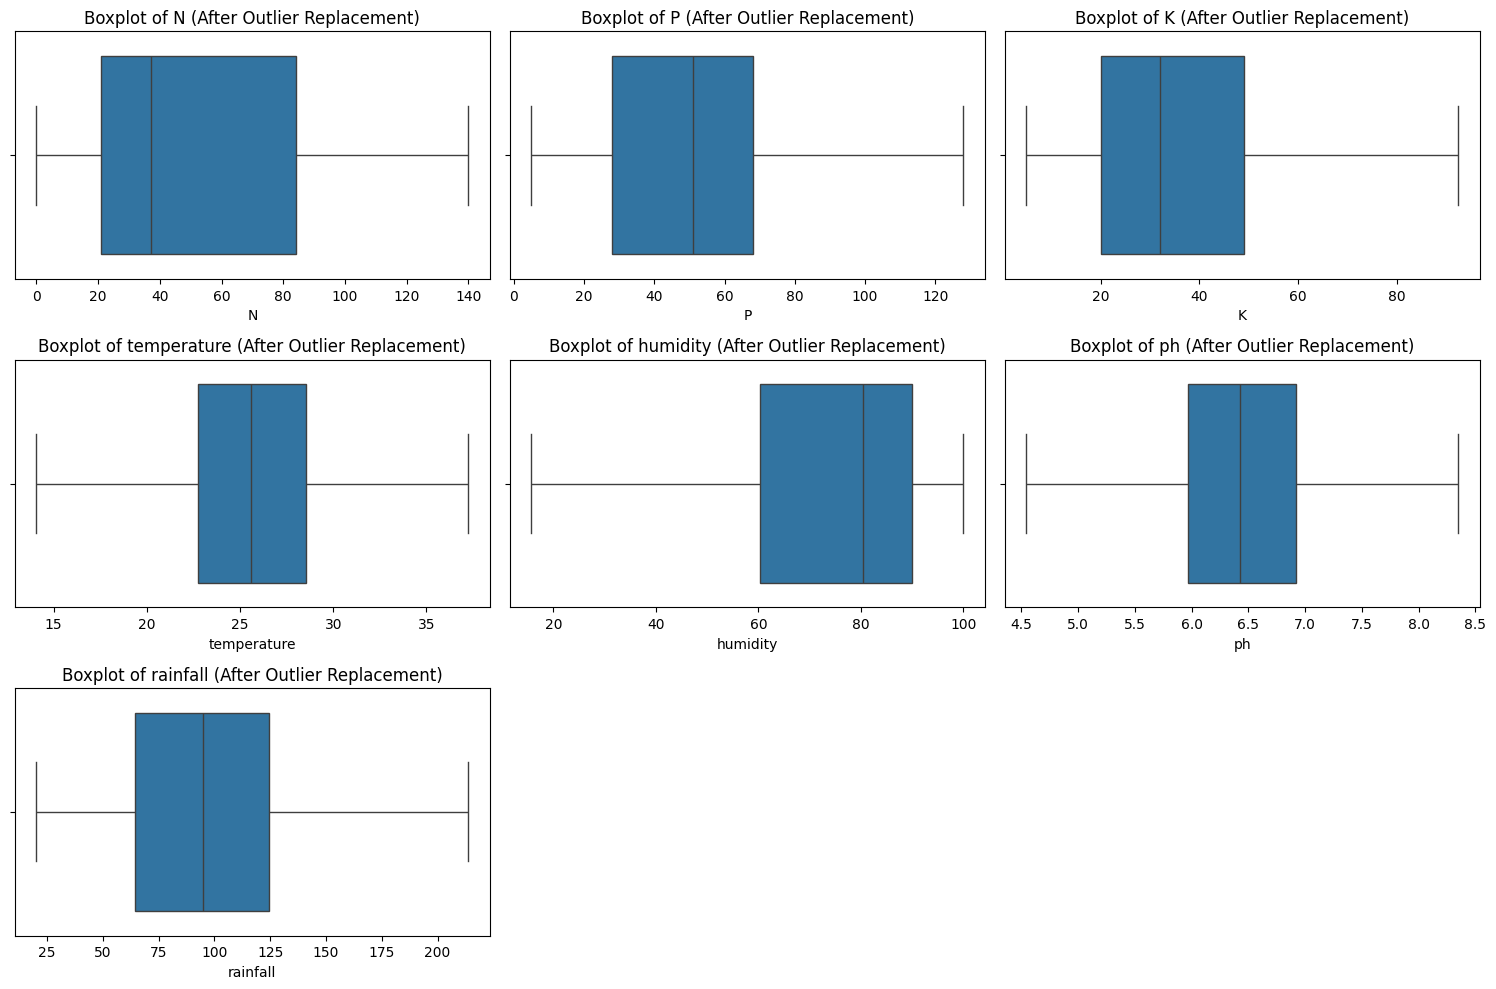

In [8]:
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with the lower or upper bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


# Verify that outliers have been replaced
print("\nAfter replacing outliers:")
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f'{col}: {len(outliers)} outliers')

# Re-visualize data using Boxplot to check
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Outlier Replacement)')
plt.tight_layout()
plt.show()

# **Standarisasi Data**

In [9]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Tampilkan beberapa baris pertama setelah standarisasi
print("\nAfter Standardization:")
print(df.head())


After Standardization:
          N         P         K  temperature  humidity        ph  rainfall  \
0  1.068797 -0.341922  0.197128    -0.993936  0.472768  0.053115  1.973430   
1  0.933329  0.167308  0.111858    -0.805930  0.397054  0.786021  2.186623   
2  0.255986  0.071827  0.239763    -0.545469  0.487075  1.884619  2.186623   
3  0.635298 -0.564710  0.069223     0.190462  0.389798  0.707000  2.186623   
4  0.743673 -0.341922  0.154493    -1.152149  0.454870  1.594621  2.186623   

  label  
0  rice  
1  rice  
2  rice  
3  rice  
4  rice  


# **Pemisahan Data dan Label**

In [10]:
X = df.drop('label', axis=1)
y = df['label']

print(y)

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


# **Membuat Data Latih dan Testing**

In [11]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1760, 7)
Shape of X_test: (440, 7)
Shape of y_train: (1760,)
Shape of y_test: (440,)


1. Shape of X_train: (1760, 7): Ini berarti data latih untuk fitur (variabel independen) memiliki 1760 baris dan 7 kolom. 1760 adalah jumlah sampel (baris) yang akan digunakan untuk melatih model, dan 7 adalah jumlah fitur (kolom) yang digunakan untuk setiap sampel.
2. Shape of X_test: (440, 7): Ini berarti data uji untuk fitur memiliki 440 baris dan 7 kolom. 440 adalah jumlah sampel yang akan digunakan untuk menguji seberapa baik model yang telah dilatih bekerja, dan 7 adalah jumlah fitur yang sama dengan data latih.
3. Shape of y_train: (1760,): Ini berarti label (variabel target) untuk data latih memiliki 1760 nilai. Ini adalah label yang sesuai dengan 1760 sampel di X_train, yang akan digunakan model untuk belajar memprediksi. Tanda koma setelah angka menunjukkan bahwa ini adalah array satu dimensi.
4. Shape of y_test: (440,): Ini berarti label untuk data uji memiliki 440 nilai. Ini adalah label yang sesuai dengan 440 sampel di X_test, yang akan digunakan untuk membandingkan prediksi model dengan nilai sebenarnya dan mengevaluasi kinerja model. Ini juga merupakan array satu dimensi.

# **Membuat Model Akurasi**

Support Vector Machine

In [12]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))

Akurasi SVM: 0.9772727272727273


Random Forest

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Akurasi Random Forest:", accuracy_score(y_test, rf.predict(X_test)))

Akurasi Random Forest: 0.9931818181818182


Decision Tree

In [14]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Akurasi Decision Tree:", accuracy_score(y_test, dt.predict(X_test)))

Akurasi Decision Tree: 0.9863636363636363


Hasil Akurasi, Precision, Recall, dan F1-score Rata-rata Model

In [18]:
from sklearn.metrics import classification_report

# Support Vector Machine
print("\nClassification Report - SVM:")
print(classification_report(y_test, y_pred_svm, zero_division=0))

# Random Forest
y_pred_rf = rf.predict(X_test)
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Decision Tree
y_pred_dt = dt.predict(X_test)
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt, zero_division=0))


Classification Report - SVM:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate average metrics for SVM
print("\nAverage Metrics - SVM:")
print("Average Precision:", precision_score(y_test, y_pred_svm, average='weighted', zero_division=0))
print("Average Recall:", recall_score(y_test, y_pred_svm, average='weighted', zero_division=0))
print("Average F1-Score:", f1_score(y_test, y_pred_svm, average='weighted', zero_division=0))

# Calculate average metrics for Random Forest
print("\nAverage Metrics - Random Forest:")
print("Average Precision:", precision_score(y_test, y_pred_rf, average='weighted', zero_division=0))
print("Average Recall:", recall_score(y_test, y_pred_rf, average='weighted', zero_division=0))
print("Average F1-Score:", f1_score(y_test, y_pred_rf, average='weighted', zero_division=0))

# Calculate average metrics for Decision Tree
print("\nAverage Metrics - Decision Tree:")
print("Average Precision:", precision_score(y_test, y_pred_dt, average='weighted', zero_division=0))
print("Average Recall:", recall_score(y_test, y_pred_dt, average='weighted', zero_division=0))
print("Average F1-Score:", f1_score(y_test, y_pred_dt, average='weighted', zero_division=0))


Average Metrics - SVM:
Average Precision: 0.9793363833136559
Average Recall: 0.9772727272727273
Average F1-Score: 0.9774385331122041

Average Metrics - Random Forest:
Average Precision: 0.9937348484848485
Average Recall: 0.9931818181818182
Average F1-Score: 0.9931754816901672

Average Metrics - Decision Tree:
Average Precision: 0.9868055555555556
Average Recall: 0.9863636363636363
Average F1-Score: 0.9863152866630287


# **Confusion Matrix**

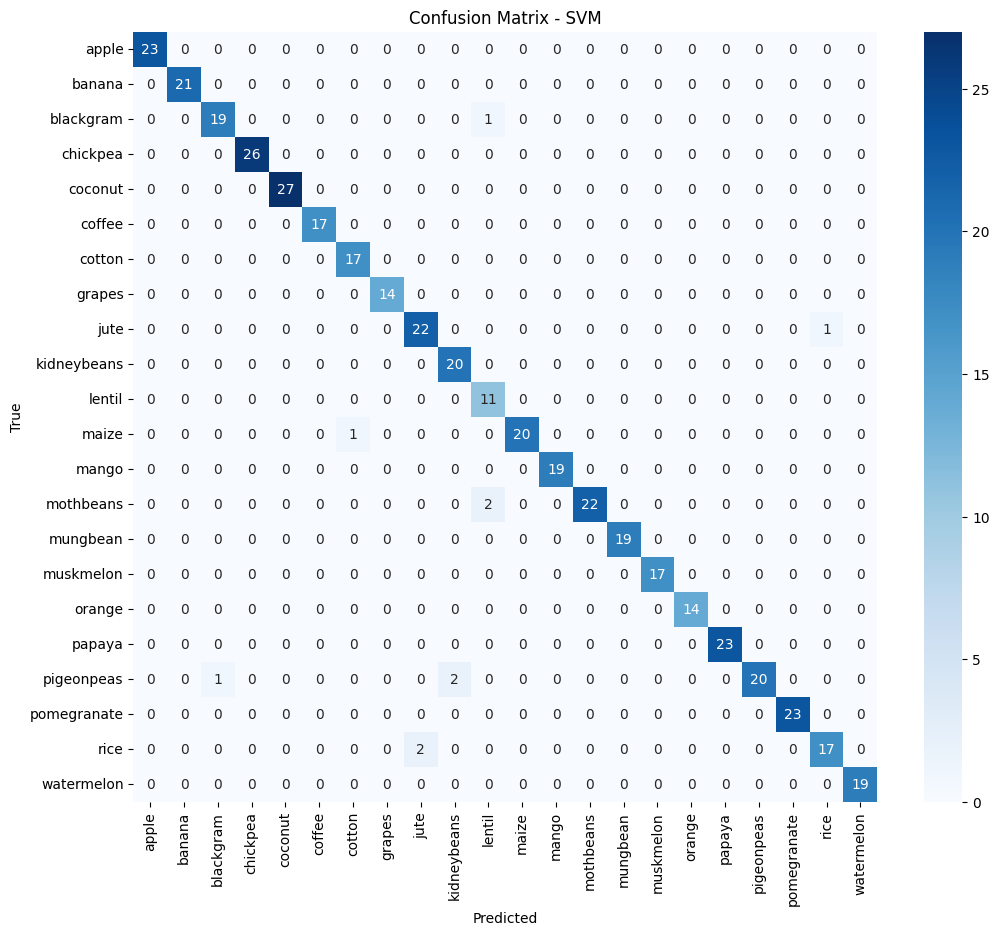

In [15]:
# Confusion Matrix SVM
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_test, y_pred_svm, labels=svm.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm.classes_,
            yticklabels=svm.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

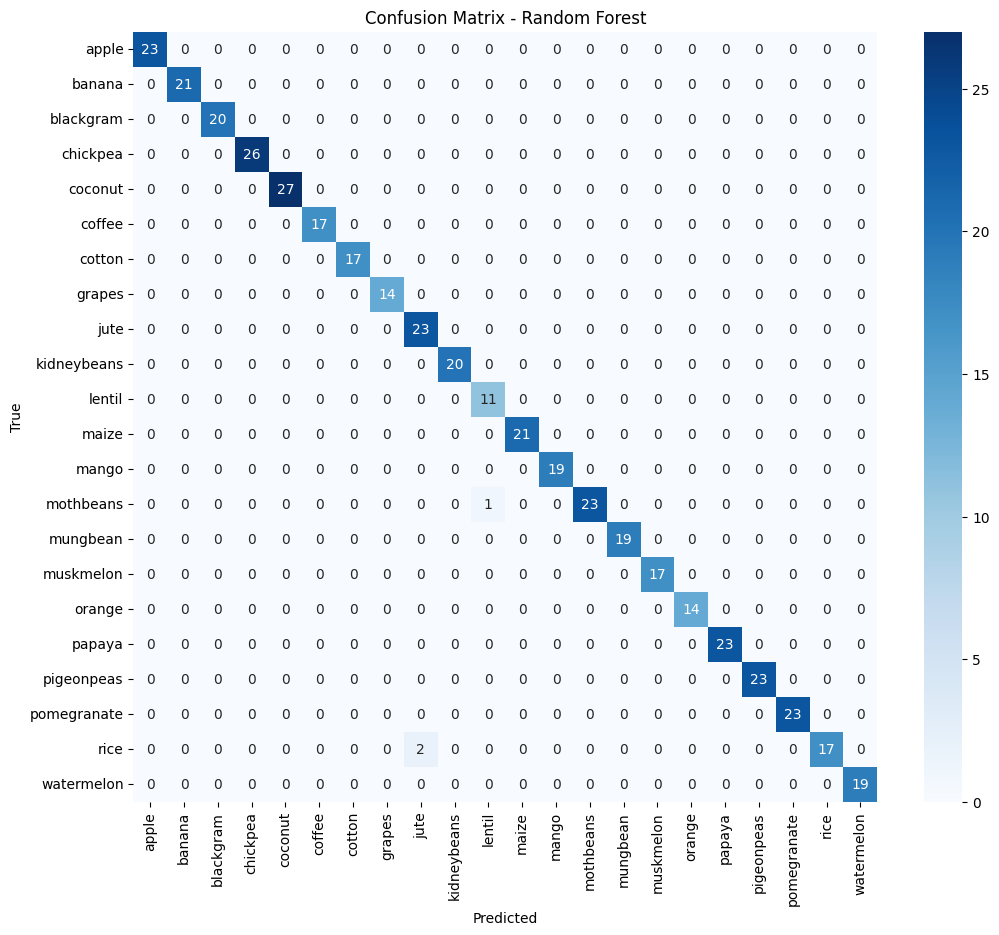

In [21]:
# Confusion Matrix Random Forest
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_,
            yticklabels=rf.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

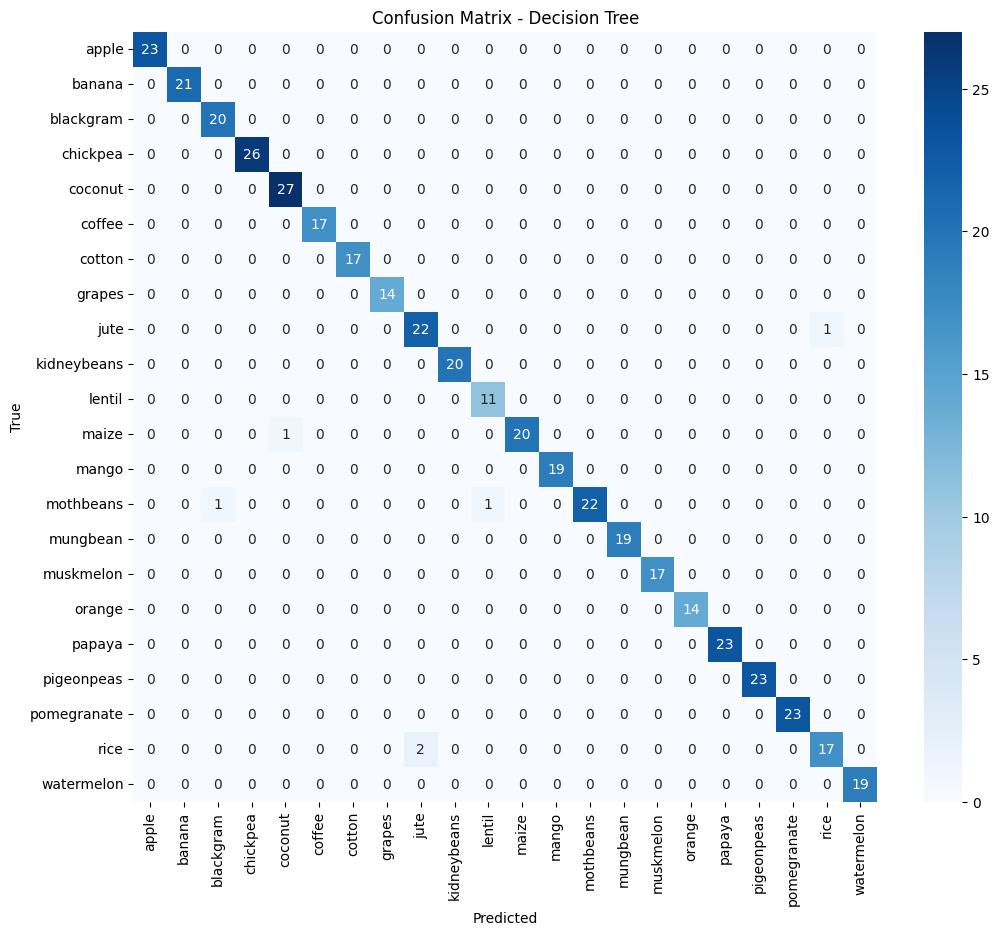

In [22]:
# Confusion Matrix Decision Tree
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_test, y_pred_dt, labels=dt.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt.classes_,
            yticklabels=dt.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Confusion Matrix ini menunjukkan seberapa baik model SVM memprediksi jenis tanaman untuk setiap sampel di data uji.

1. Setiap baris mewakili jumlah sampel yang sebenarnya dari jenis tanaman tertentu.
2. Setiap kolom mewakili jumlah sampel yang diprediksi oleh model sebagai jenis tanaman tertentu.

Angka pada diagonal utama (dari kiri atas ke kanan bawah) adalah jumlah sampel yang diklasifikasikan dengan benar untuk setiap jenis tanaman. Misalnya:

1. Angka di baris apple dan kolom apple menunjukkan berapa banyak sampel apple yang benar-benar diprediksi sebagai apple.
2. Angka di baris banana dan kolom banana menunjukkan berapa banyak sampel banana yang benar-benar diprediksi sebagai banana.
3. Dan seterusnya untuk semua jenis tanaman.

Angka di luar diagonal utama adalah jumlah sampel yang salah diklasifikasikan. Misalnya:

1. Angka di baris apple dan kolom mango berarti ada sejumlah sampel yang sebenarnya apple tetapi diprediksi oleh model sebagai mango.
2. Angka di baris rice dan kolom maize berarti ada sejumlah sampel yang sebenarnya rice tetapi diprediksi oleh model sebagai maize.